In [88]:
import seaborn as sns
sns.load_dataset("mpg")
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

#### Create a visual showing the relationship between horsepower and fuel economy.

<Axes: xlabel='horsepower', ylabel='mpg'>

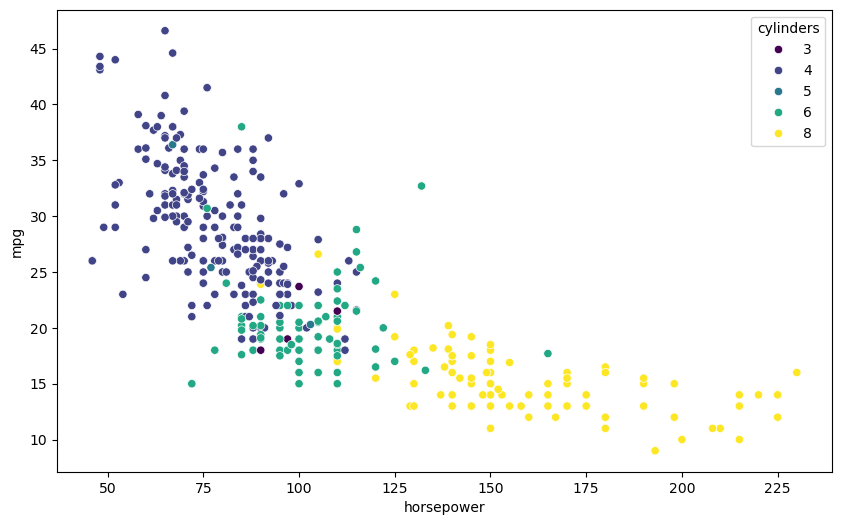

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(mpg, x='horsepower', y='mpg', hue='cylinders', palette='viridis')

# This visualization shows how horsepower affects fuel economy, and the color-coding by cylinders add extra context.
# The higher amount of cylinders, thus more horsepower, leads to less fuel efficiency from the vehicle.

#### Create a table summarizing fuel economy by country of origin.


In [79]:
# Create a summary table by country of origin
summary_table = mpg.groupby('origin').agg(
    mean_mpg=('mpg', 'mean'),
    median_mpg=('mpg', 'median'),
    count=('mpg', 'size')
).reset_index()
summary_table = summary_table.round(2)
print("Fuel Efficiency by Country of Origin")
print(summary_table)

# While the USA has produced almost twice as many models as Europe and Japan combined, they own the worst fuel economy amongst those origins.
# Japan has seemed to produce the highest frequency of fuel-efficient cars.

Fuel Efficiency by Country of Origin
   origin  mean_mpg  median_mpg  count
0  europe     27.89        26.5     70
1   japan     30.45        31.6     79
2     usa     20.08        18.5    249


#### Create a visual showing how fuel economy has changed over time.

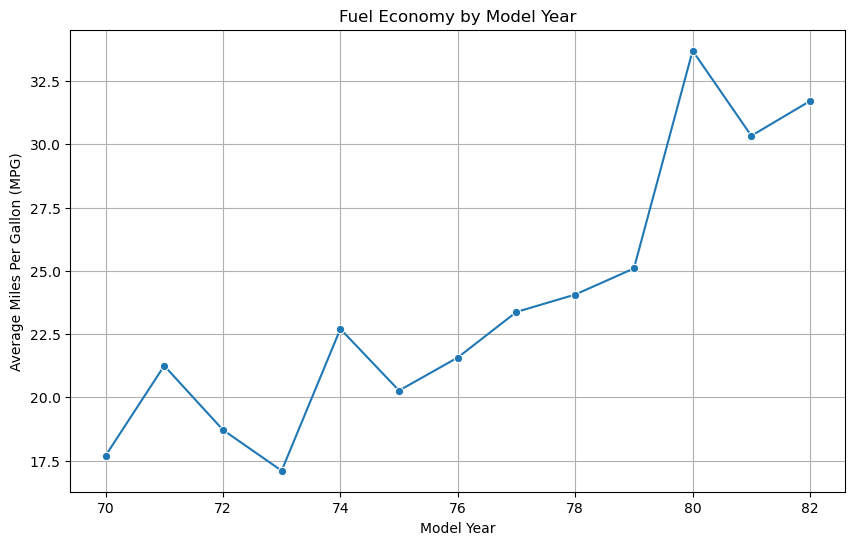

In [66]:
# Calculate average fuel economy per model year
avg_mpg_by_year = mpg.groupby('model_year')['mpg'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_mpg_by_year, x='model_year', y='mpg', marker='o')
plt.title('Fuel Economy by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Miles Per Gallon (MPG)')
plt.grid(True)

# Of all the model years used, fuel efficiency had slowly trended upward between 1975-1979 before making a huge jump to its peak in 1980.

#### Create two other visuals or tables related to fuel economy.


In [77]:
top_cars = mpg[['name', 'mpg', 'model_year', 'origin']].sort_values(by='mpg', ascending=False).head(10)
print("Top 10 Most Fuel-Efficient Cars")
print(top_cars)

# This table lists the 10 most fuel-efficient cars sorted by 'mpg' in descending order.

Top 10 Most Fuel-Efficient Cars
                                name   mpg  model_year  origin
322                        mazda glc  46.6          80   japan
329              honda civic 1500 gl  44.6          80   japan
325             vw rabbit c (diesel)  44.3          80  europe
394                        vw pickup  44.0          82  europe
326               vw dasher (diesel)  43.4          80  europe
244  volkswagen rabbit custom diesel  43.1          78  europe
309                        vw rabbit  41.5          80  europe
330             renault lecar deluxe  40.9          80  europe
324                       datsun 210  40.8          80   japan
247                   datsun b210 gx  39.4          78   japan


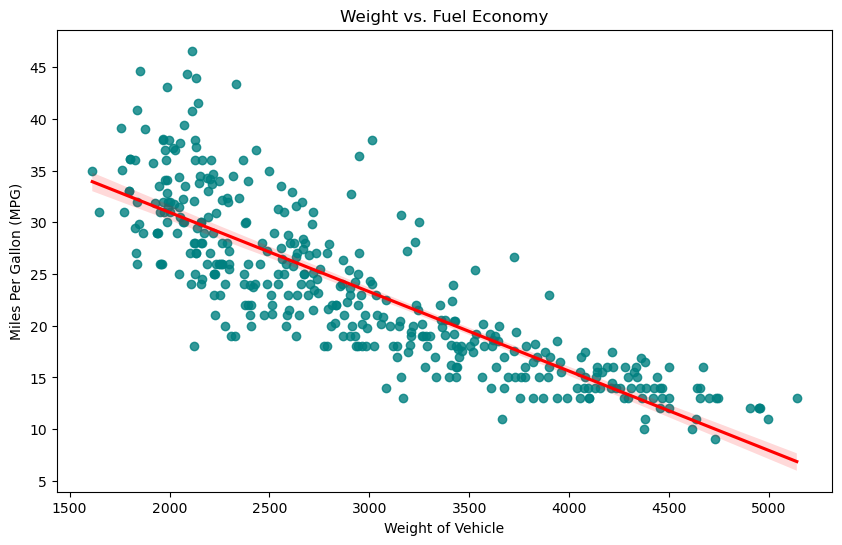

In [85]:
plt.figure(figsize=(10, 6))
sns.regplot(data=mpg, x='weight', y='mpg', scatter_kws={'color': 'teal'}, line_kws={'color': 'red'})
plt.title('Weight vs. Fuel Economy')
plt.xlabel('Weight of Vehicle')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

# This plot shows the inverse relationship between weight and mpg, with heavier cars typically having lower fuel efficiency.